In [242]:
#importing the neccessary libraries
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
#connecting to the website
url = requests.get('https://www.basketball-reference.com/players/c/curryst01/gamelog/2016#all_pgl_basic')

In [244]:
#parsing and printing out the webpage html
webpage =bs(url.content,'html.parser')
#print(webpage.prettify())

In [245]:
table_data = webpage.find(id="pgl_basic")
#print(table_data)

In [246]:
# get table headers
table_head = table_data.find("thead")
table_headers = table_head.find("tr").find_all("th")
headers = []
for item in table_headers[1:]:
  headers.append(item.string)
print(headers)
print(len(headers))

['G', 'Date', 'Age', 'Tm', '\xa0', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']
29


In [247]:
#get table body
table_body = table_data.find("tbody")

#get the first row
first_row = table_body.find("tr").find_all("td")
row1 = []
for item in first_row:
    row1.append(item.string)
print(row1)
print(len(row1))

['1', '2015-10-27', '27-227', 'GSW', None, 'NOP', 'W (+16)', '1', '35:37', '14', '26', '.538', '5', '12', '.417', '7', '7', '1.000', '3', '3', '6', '7', '2', '0', '2', '1', '40', '34.9', '+12']
29


In [248]:
# Get table body
table_body = table_data.find("tbody")

# Get all rows
all_rows = table_body.find_all("tr")
table_rows = []

# Looping through each row
for row in all_rows:
    # Find all the <td> elements within the current row
    row_data = row.find_all("td")

    # Extract and append the text content of each <td> to the current_row list
    current_row = []
    for cell in row_data:
        current_row.append(cell.text)

    # Append the current_row list to the table_rows list
    table_rows.append(current_row)

# Print the table data
print(table_rows)

[['1', '2015-10-27', '27-227', 'GSW', '', 'NOP', 'W (+16)', '1', '35:37', '14', '26', '.538', '5', '12', '.417', '7', '7', '1.000', '3', '3', '6', '7', '2', '0', '2', '1', '40', '34.9', '+12'], ['2', '2015-10-30', '27-230', 'GSW', '@', 'HOU', 'W (+20)', '1', '27:24', '9', '15', '.600', '4', '9', '.444', '3', '4', '.750', '0', '7', '7', '6', '1', '0', '1', '4', '25', '22.4', '+12'], ['3', '2015-10-31', '27-231', 'GSW', '@', 'NOP', 'W (+14)', '1', '35:38', '17', '27', '.630', '8', '14', '.571', '11', '11', '1.000', '0', '4', '4', '9', '4', '0', '2', '3', '53', '49.2', '+16'], ['4', '2015-11-02', '27-233', 'GSW', '', 'MEM', 'W (+50)', '1', '28:24', '10', '16', '.625', '4', '8', '.500', '6', '6', '1.000', '1', '2', '3', '3', '3', '1', '3', '2', '30', '26.1', '+37'], ['5', '2015-11-04', '27-235', 'GSW', '', 'LAC', 'W (+4)', '1', '32:38', '8', '17', '.471', '7', '11', '.636', '8', '9', '.889', '0', '5', '5', '4', '1', '0', '0', '3', '31', '26.0', '+7'], ['6', '2015-11-06', '27-237', 'GSW', '

In [249]:
df = pd.DataFrame(table_rows,columns=headers)
print(df)

       G        Date     Age    Tm         Opp             GS     MP    FG  \
0      1  2015-10-27  27-227   GSW         NOP  W (+16)     1  35:37    14   
1      2  2015-10-30  27-230   GSW     @   HOU  W (+20)     1  27:24     9   
2      3  2015-10-31  27-231   GSW     @   NOP  W (+14)     1  35:38    17   
3      4  2015-11-02  27-233   GSW         MEM  W (+50)     1  28:24    10   
4      5  2015-11-04  27-235   GSW         LAC   W (+4)     1  32:38     8   
..   ...         ...     ...   ...   ...   ...      ...   ...    ...   ...   
81    76  2016-04-07  28-024   GSW         SAS  W (+11)     1  36:17    11   
82    77  2016-04-09  28-026   GSW     @   MEM   W (+1)     1  33:59     7   
83  None        None    None  None  None  None     None  None   None  None   
84    78  2016-04-10  28-027   GSW     @   SAS   W (+6)     1  35:22    13   
85    79  2016-04-13  28-030   GSW         MEM  W (+21)     1  29:46    15   

    ...   DRB   TRB   AST   STL   BLK   TOV    PF   PTS  GmSc  

In [250]:
df.drop('\xa0', axis=1, inplace=True)
df.rename(columns={'G': 'Games_played', 'Tm': 'Team', 'Opp': 'Opponent', 'GS': 'Games_Started', 'MP': 'Minutes_Played', 'FG': 'Field_Goals_Made', 'FGA': 'Field_Goals_Attempted', 'FG%': 'Field_Goal_Percentage', '3P':'3Point_Field_Goals_Made', '3PA':'3Point_Field_Goals_Attempted', '3P%':'3Point_Field_Goal_Percentage', 'FT':'Free_Throws_Made', 'FTA':'Free_Throws_Attempted', 'FT%':'Free_Throw_Percentage', 'ORB':'Offensive_Rebounds','DRB': 'Defensive_Rebounds', 'TRB': 'Total_Rebounds', 'AST': 'Assists', 'STL': 'Steals', 'BLK': 'Blocks', 'TOV': 'Turnovers', 'PF': 'Personal_Fouls', 'PTS': 'Points', 'GmSc': 'Game_Score', '+/-': 'Point_Differential'}, inplace=True)
print(df)

   Games_played        Date     Age  Team Opponent Games_Started  \
0             1  2015-10-27  27-227   GSW      NOP             1   
1             2  2015-10-30  27-230   GSW      HOU             1   
2             3  2015-10-31  27-231   GSW      NOP             1   
3             4  2015-11-02  27-233   GSW      MEM             1   
4             5  2015-11-04  27-235   GSW      LAC             1   
..          ...         ...     ...   ...      ...           ...   
81           76  2016-04-07  28-024   GSW      SAS             1   
82           77  2016-04-09  28-026   GSW      MEM             1   
83         None        None    None  None     None          None   
84           78  2016-04-10  28-027   GSW      SAS             1   
85           79  2016-04-13  28-030   GSW      MEM             1   

   Minutes_Played Field_Goals_Made Field_Goals_Attempted  \
0           35:37               14                    26   
1           27:24                9                    15   
2  

In [251]:
df.dropna(inplace=True)
print(df)

   Games_played        Date     Age Team Opponent Games_Started  \
0             1  2015-10-27  27-227  GSW      NOP             1   
1             2  2015-10-30  27-230  GSW      HOU             1   
2             3  2015-10-31  27-231  GSW      NOP             1   
3             4  2015-11-02  27-233  GSW      MEM             1   
4             5  2015-11-04  27-235  GSW      LAC             1   
..          ...         ...     ...  ...      ...           ...   
80           75  2016-04-05  28-022  GSW      MIN             1   
81           76  2016-04-07  28-024  GSW      SAS             1   
82           77  2016-04-09  28-026  GSW      MEM             1   
84           78  2016-04-10  28-027  GSW      SAS             1   
85           79  2016-04-13  28-030  GSW      MEM             1   

   Minutes_Played Field_Goals_Made Field_Goals_Attempted  \
0           35:37               14                    26   
1           27:24                9                    15   
2           35:

In [252]:
df['Age'] = df['Age'].str.split('-').str[0]
print(df)

   Games_played        Date Age Team Opponent Games_Started Minutes_Played  \
0             1  2015-10-27  27  GSW      NOP             1          35:37   
1             2  2015-10-30  27  GSW      HOU             1          27:24   
2             3  2015-10-31  27  GSW      NOP             1          35:38   
3             4  2015-11-02  27  GSW      MEM             1          28:24   
4             5  2015-11-04  27  GSW      LAC             1          32:38   
..          ...         ...  ..  ...      ...           ...            ...   
80           75  2016-04-05  28  GSW      MIN             1          42:35   
81           76  2016-04-07  28  GSW      SAS             1          36:17   
82           77  2016-04-09  28  GSW      MEM             1          33:59   
84           78  2016-04-10  28  GSW      SAS             1          35:22   
85           79  2016-04-13  28  GSW      MEM             1          29:46   

   Field_Goals_Made Field_Goals_Attempted Field_Goal_Percentage

In [263]:
#To split the Data column and append to the end of the dataframe
df['Year'] = df['Date'].str.split('-').str[0]
df['Month'] = df['Date'].str.split('-').str[1]
df['Day'] = df['Date'].str.split('-').str[2]

#To append to a specified position
# df.insert(1, 'Year', df['Date'].str.split('-').str[0])
# df.insert(2, 'Month', df['Date'].str.split('-').str[1])
# df.insert(3, 'Day', df['Date'].str.split('-').str[2])

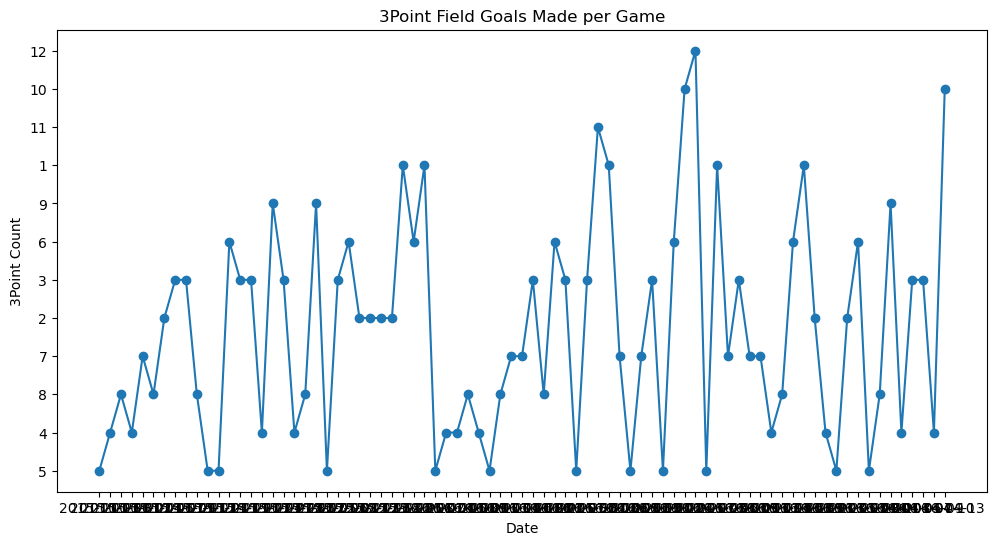

In [254]:
x = df['Date']
y = df['3Point_Field_Goals_Made']
plt.figure(figsize=(12, 6))  # Optional: set the figure size
plt.plot(x, y, marker='o', linestyle='-')  # 'o' for markers, '-' for line style
plt.title('3Point Field Goals Made per Game')
plt.xlabel('Date')
plt.ylabel('3Point Count')
plt.show()

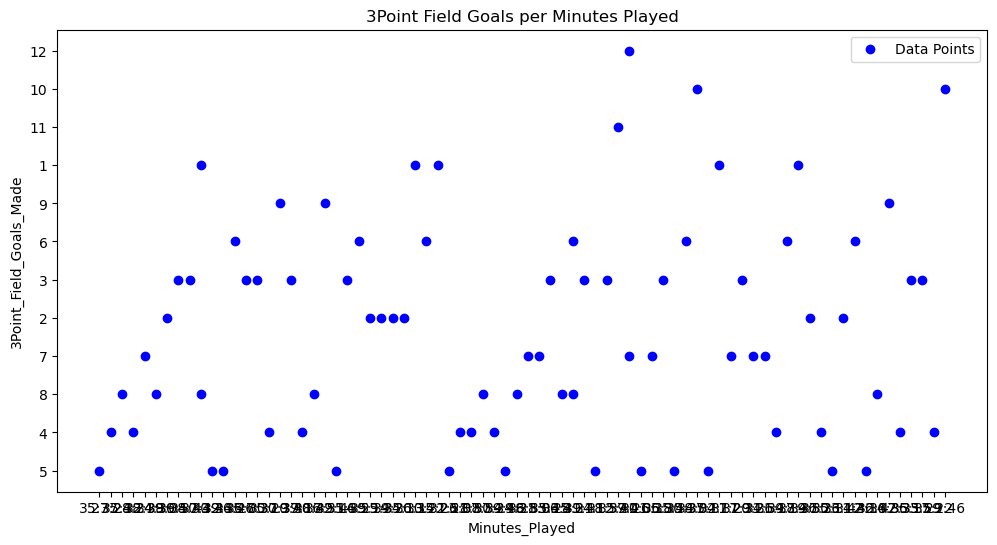

In [229]:
x = df['Minutes_Played']
y = df['3Point_Field_Goals_Made']
plt.figure(figsize=(12, 6))  # Optional: set the figure size
plt.scatter(x, y, label='Data Points', color='blue', marker='o')
plt.title('3Point Field Goals per Minutes Played')
plt.xlabel('Minutes_Played')
plt.ylabel('3Point_Field_Goals_Made')
plt.legend()
plt.show()

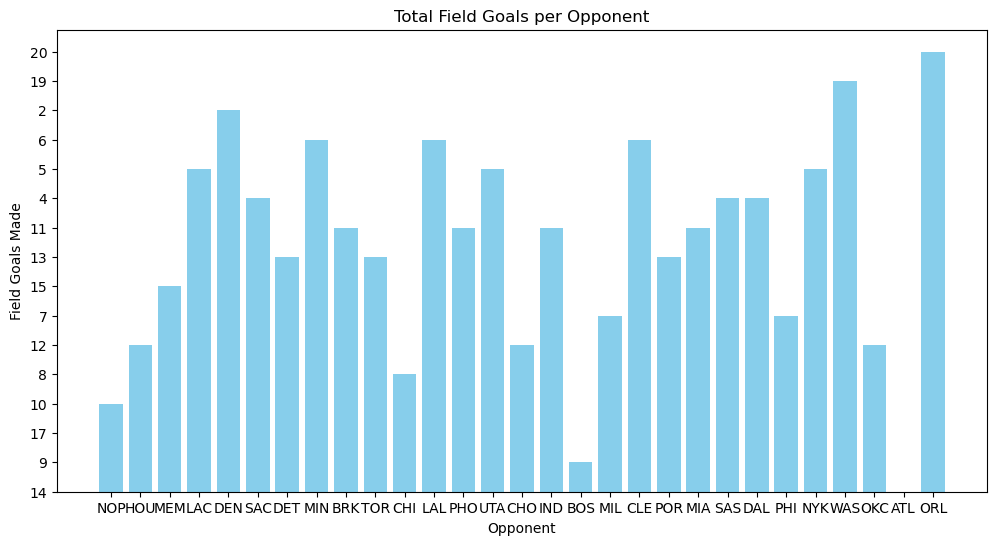

In [225]:
x = df['Opponent']
y = df['Field_Goals_Made']
plt.figure(figsize=(12, 6))  # Optional: set the figure size
plt.bar(x, y, color='skyblue')
plt.title('Total Field Goals per Opponent')
plt.xlabel('Opponent')
plt.ylabel('Field Goals Made')
plt.grid(axis='y', linestyle=' ', alpha=0.9)  # Optional: add horizontal gridlines
plt.show()

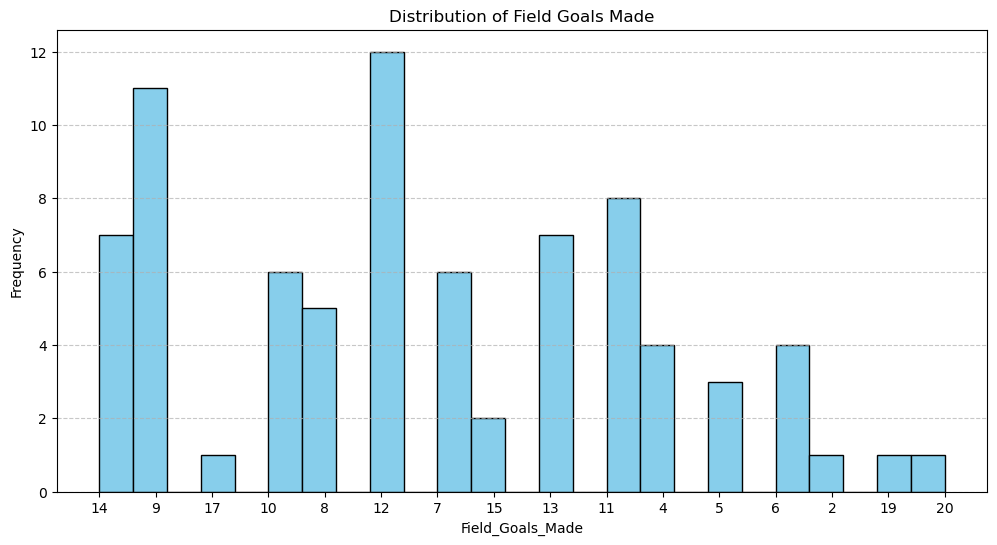

In [228]:
# Extract data for the histogram
values = df['Field_Goals_Made']

# Create a histogram
plt.figure(figsize=(12, 6))  # Optional: set the figure size
plt.hist(values, bins=25, color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Distribution of Field Goals Made')
plt.xlabel('Field_Goals_Made')
plt.ylabel('Frequency')

# Display the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add horizontal gridlines
plt.show()

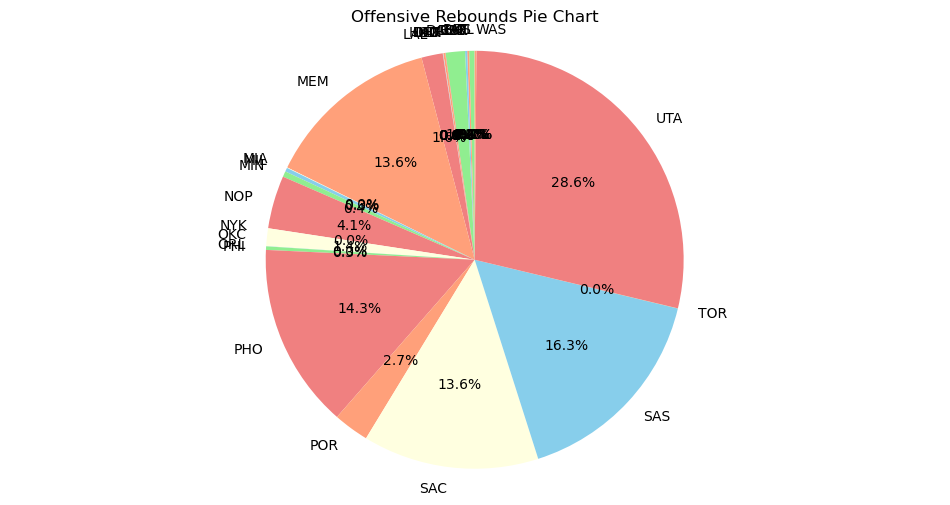

In [237]:
# Group by 'Opponent' and calculate the sum of offensive rebounds for each opponent
grouped_data = df.groupby('Opponent')['Offensive_Rebounds'].sum().reset_index()

# Extract data for the pie chart
values = grouped_data['Offensive_Rebounds']
categories = grouped_data['Opponent']

# Create a pie chart
plt.figure(figsize=(12, 6))  # Optional: set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightyellow'], startangle=90)

# Customize the chart
plt.title('Offensive Rebounds Pie Chart')

# Display the chart
plt.axis('equal')  # Optional: make the pie chart circular
plt.show()

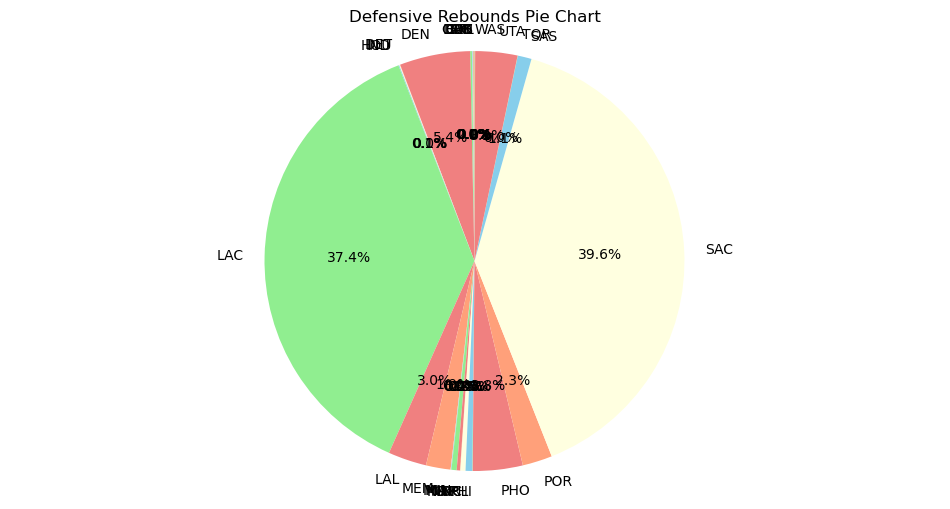

In [238]:
# Group by 'Opponent' and calculate the sum of offensive rebounds for each opponent
grouped_data = df.groupby('Opponent')['Defensive_Rebounds'].sum().reset_index()

# Extract data for the pie chart
values = grouped_data['Defensive_Rebounds']
categories = grouped_data['Opponent']

# Create a pie chart
plt.figure(figsize=(12, 6))  # Optional: set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightyellow'], startangle=90)

# Customize the chart
plt.title('Defensive Rebounds Pie Chart')

# Display the chart
plt.axis('equal')  # Optional: make the pie chart circular
plt.show()

In [233]:
print(df['Opponent'].nunique())

29


In [234]:
print(df['Opponent'].count())

79


In [262]:
print(df)

   Games_played        Date Age Team Opponent Games_Started Minutes_Played  \
0             1  2015-10-27  27  GSW      NOP             1          35:37   
1             2  2015-10-30  27  GSW      HOU             1          27:24   
2             3  2015-10-31  27  GSW      NOP             1          35:38   
3             4  2015-11-02  27  GSW      MEM             1          28:24   
4             5  2015-11-04  27  GSW      LAC             1          32:38   
..          ...         ...  ..  ...      ...           ...            ...   
80           75  2016-04-05  28  GSW      MIN             1          42:35   
81           76  2016-04-07  28  GSW      SAS             1          36:17   
82           77  2016-04-09  28  GSW      MEM             1          33:59   
84           78  2016-04-10  28  GSW      SAS             1          35:22   
85           79  2016-04-13  28  GSW      MEM             1          29:46   

   Field_Goals_Made Field_Goals_Attempted Field_Goal_Percentage

In [265]:
print(df['Field_Goals_Made'].mean())

1.8882415352900651e+121


In [266]:
print(df['Field_Goals_Made'].mode())

0    12
Name: Field_Goals_Made, dtype: object


In [267]:
print(df['Field_Goals_Made'].min())

10


In [268]:
print(df['Field_Goals_Made'].max())

9


In [273]:
print(df['Field_Goals_Made'].dtype)

object


In [277]:
print(df['3Point_Field_Goals_Made'].dtype)

object


In [274]:
df['Field_Goals_Made'] = pd.to_numeric(df['Field_Goals_Made'])

In [278]:
df['3Point_Field_Goals_Made'] = pd.to_numeric(df['3Point_Field_Goals_Made'])

In [279]:
print(df['Field_Goals_Made'].sum())

805


In [280]:
print(df['Field_Goals_Made'].describe())

count    79.000000
mean     10.189873
std       3.471776
min       2.000000
25%       8.000000
50%      10.000000
75%      12.000000
max      20.000000
Name: Field_Goals_Made, dtype: float64


In [281]:
print(df['3Point_Field_Goals_Made'].describe())

count    79.000000
mean      5.088608
std       2.552977
min       1.000000
25%       3.000000
50%       5.000000
75%       7.000000
max      12.000000
Name: 3Point_Field_Goals_Made, dtype: float64
